# World Cup Data Visualization

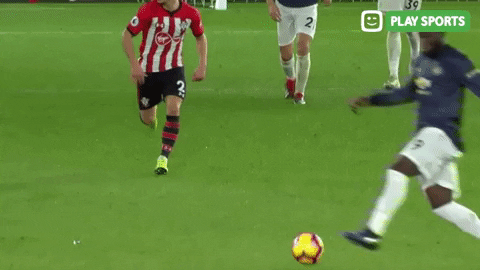

In [14]:
from IPython.display import Image
Image(filename = 'giphy.gif')

For this assignment, I decided to use data from Kaggle on 
[the World Cup figures from 1930-2014.](https://www.kaggle.com/abecklas/fifa-world-cup)

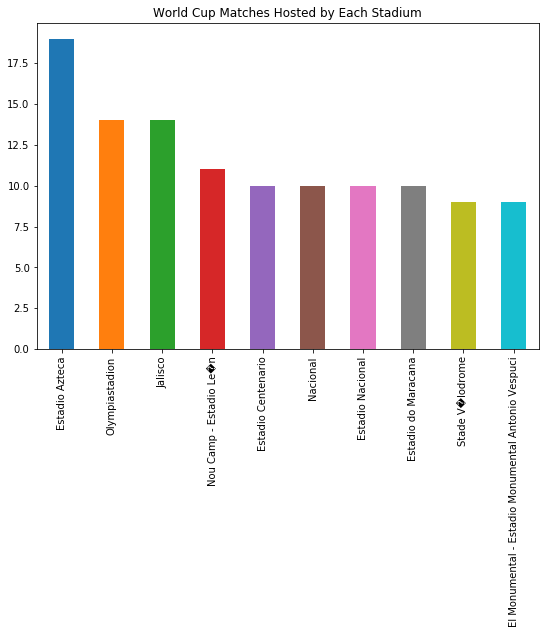

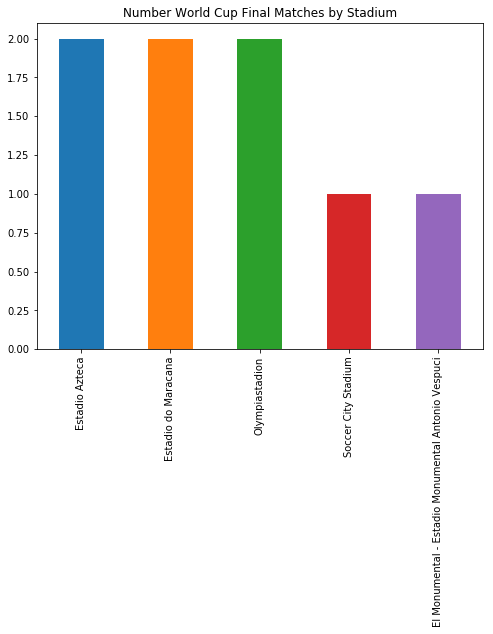

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
from ipywidgets import interact, fixed
import matplotlib.pyplot as plt
from scipy import stats
from IPython.display import Image
import matplotlib
from matplotlib import cm
from sklearn.linear_model import LinearRegression
from sklearn import datasets
from sklearn.linear_model import LogisticRegression

wc = pd.read_csv('WorldCupMatches.csv')
winners = pd.read_csv('WorldCups.csv')
newcols = {'Home Team Name' : 'Home_Team_Name','Year': 'Year', 
           'Datetime': 'Date',
          'Stage' : 'Stage',
          'Stadium' : 'Stadium',
          'Home Team Goals': 'Home_Team_Goals',
          'Away Team Goals': 'Away_Team_Goals',
          'Away Team Name': 'Away_Team_Name',
          'Wind conditions': 'Win_conditions',
          'Attendance' : 'Attendance',
          'Half-time Home Goals':'Halftime_Home_Goals',
          'Half-time Away Goals': 'Halftime_Away_Goals',
          'Assistant 1' : 'Assistant1',
          'Assistant 2': 'Assistant2',
          'RoundID': 'RoundID', 'MatchID': 'MatchID', 'Home Team Initials' : 'Home_Team_Initials', 'Away Team Initials': 'Away_Team_Initials'}
wc = wc.rename(columns = newcols)
wc.dropna()
newcols1 = {'Year' : 'Year', 'Country': 'Country', 'Winner': 'Winner', 'Runners-Up':'Runner_up', 'Third': 'Third', 'Fourth' : 'Fourth'}
winners = winners.rename(columns = newcols1)
finals = wc[wc.Stage == 'Final']
finals.Home_Team_Name.str.replace('FR', '')
finals.Away_Team_Name.str.replace('FR', '')
winners['average_goals'] = winners.GoalsScored/winners.MatchesPlayed
winners['Winner']= winners.Winner.str.replace('Germany FR', 'Germany')
winners['Runner_up'] = winners.Runner_up.str.replace('Germany FR', 'Germany')
winners['Third'] = winners.Third.str.replace('Germany FR', 'Germany')
winners

wc.Stadium.value_counts().head(10).plot.bar(figsize = (9,6))
plt.title('World Cup Matches Hosted by Each Stadium')
plt.show()
finals.Stadium.value_counts().head().plot.bar(figsize = (8,6))
plt.title('Number World Cup Final Matches by Stadium');

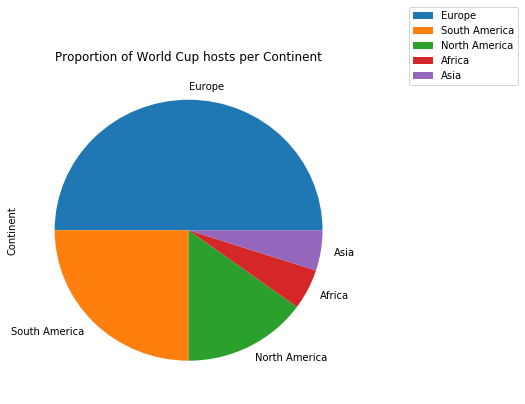

In [2]:
EU = ['Italy', 'France','Germany', 'Switzerland','Spain' , 'Sweden', 'England']
NA = ['Mexico', 'USA']
AS = ['Korea/Japan']
SA = ['Chile', 'Argentina', 'Uruguay', 'Brazil']
AF = ['South Africa']

winners.loc[winners.Country.isin(EU), 'Continent'] = 'Europe'
winners.loc[winners.Country.isin(NA), 'Continent'] = 'North America'
winners.loc[winners.Country.isin(AS), 'Continent'] = 'Asia'
winners.loc[winners.Country.isin(SA), 'Continent'] = 'South America'
winners.loc[winners.Country.isin(AF), 'Continent'] = 'Africa'
winners.Continent.value_counts().plot.pie(figsize = (6,6))
plt.title('Proportion of World Cup hosts per Continent')
plt.legend(bbox_to_anchor = (1.5,1.2));

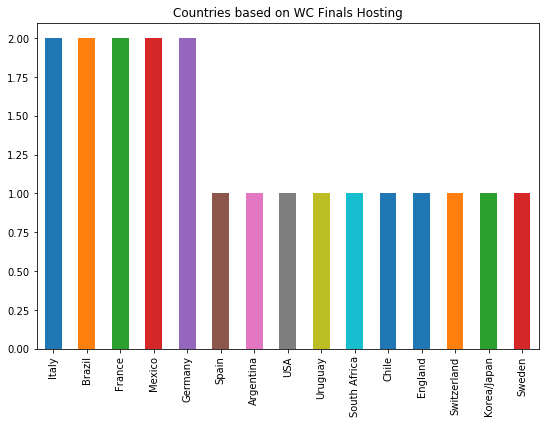

In [3]:
winners.Country.value_counts().plot.bar(figsize = (9,6))
plt.title('Countries based on WC Finals Hosting');

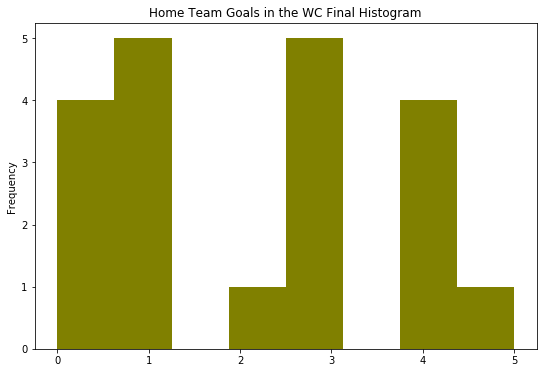

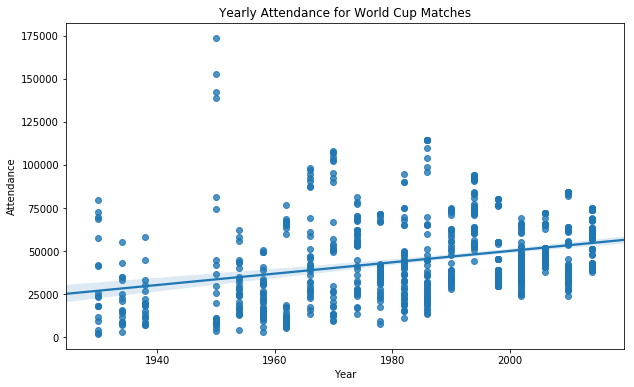

In [28]:
finals.Home_Team_Goals.plot.hist(figsize = (9,6), bins = 8 , color = 'olive');
plt.title('Home Team Goals in the WC Final Histogram')
plt.show()
year_avg = wc.groupby('Year')[['Attendance']].mean()
plt.figure(figsize = (10,6))
sns.regplot('Year', 'Attendance', data = wc)
plt.title('Yearly Attendance for World Cup Matches')
plt.show();

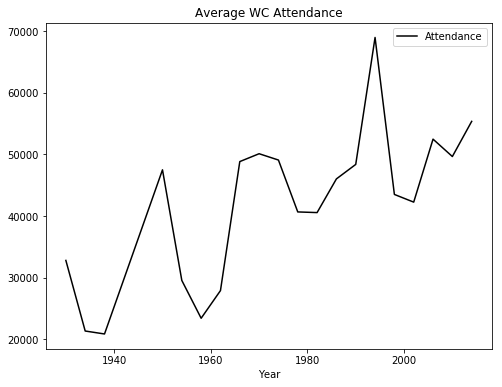

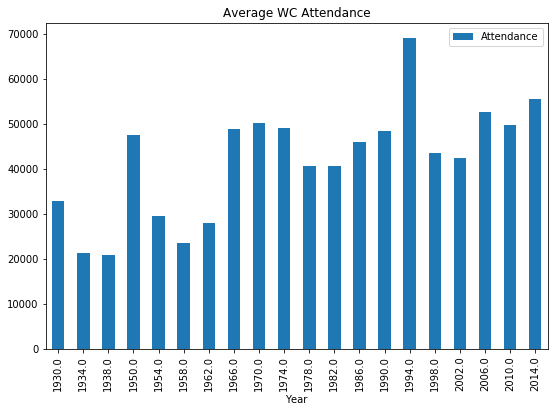

In [5]:
year_avg.plot(color = 'black', figsize = (8,6))
plt.title('Average WC Attendance')
year_avg.sort_index().plot.bar(figsize = (9,6))
plt.title('Average WC Attendance');

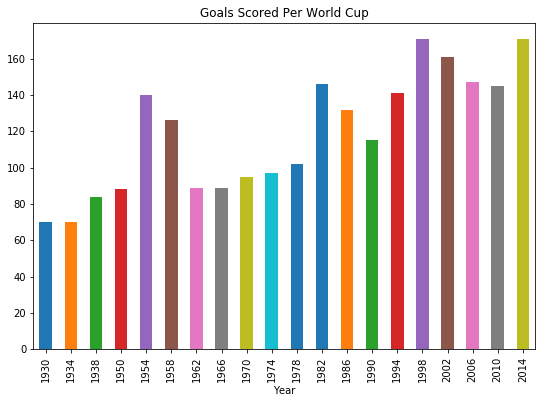

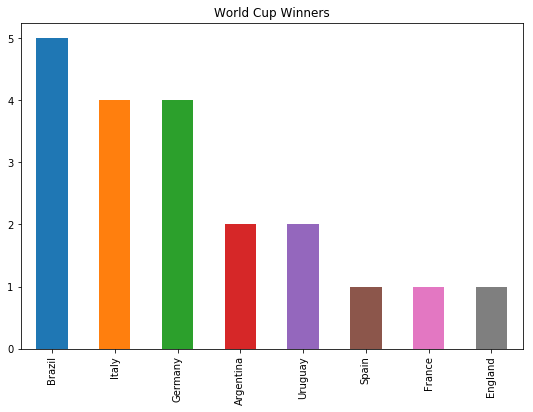

In [6]:
winners.groupby('Year')['GoalsScored'].mean().plot.bar(figsize = (9,6))
plt.title('Goals Scored Per World Cup')
plt.show()
winners.Winner.value_counts().plot.bar(figsize = (9,6))
plt.title('World Cup Winners')
plt.show()

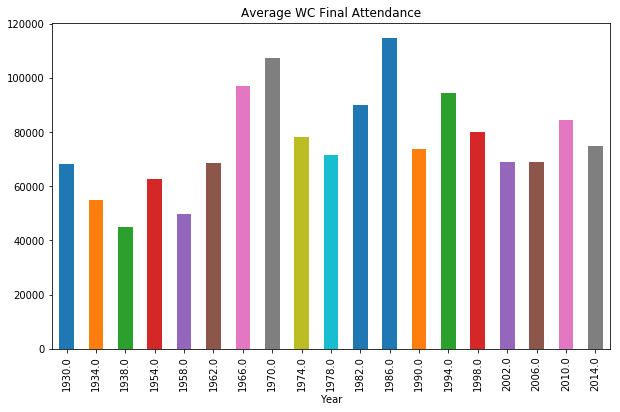

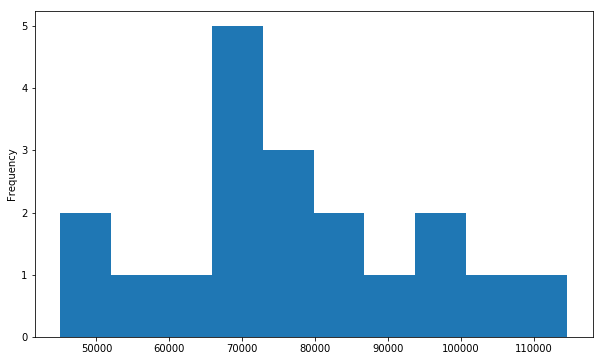

In [7]:
wc[wc.Stage == 'Final'].groupby('Year')['Attendance'].mean().plot.bar(figsize = (10,6))
plt.title('Average WC Final Attendance')
plt.show()
wc[wc.Stage == 'Final'].groupby('Year')['Attendance'].mean().plot.hist(figsize = (10,6));
plt.show()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


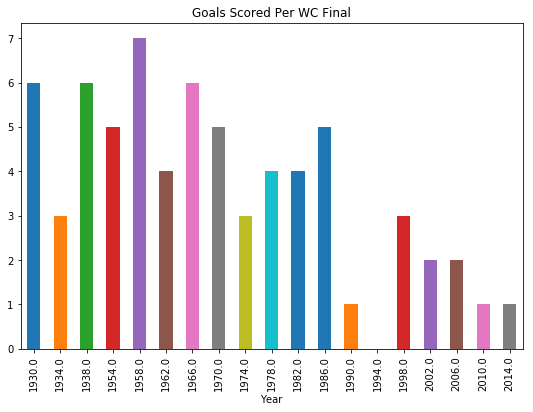

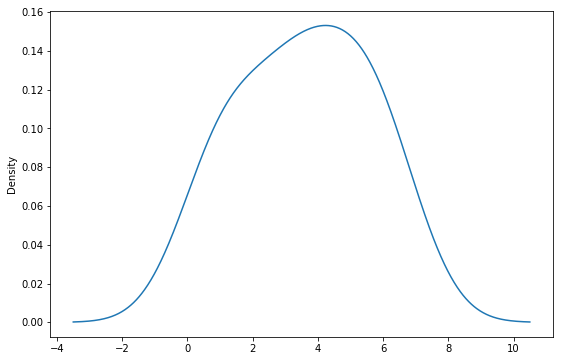

In [8]:
final_goals = finals
finals['GoalsTotal'] = finals.Home_Team_Goals + finals.Away_Team_Goals
finals.groupby('Year')['GoalsTotal'].mean().plot.bar(figsize = (9,6))
plt.title('Goals Scored Per WC Final')
plt.show()
finals.groupby('Year')['GoalsTotal'].mean().plot.kde(figsize = (9,6));

In [9]:
def categorical_variable_distribution(col):
    wc[col].value_counts(ascending=True,normalize=True).tail(20).plot.barh(figsize = (9,6))
    plt.show()
categorical_columns = wc.select_dtypes(
    ['object', 'category']).columns.tolist()
interact(categorical_variable_distribution, col=categorical_columns, df = fixed(finals));
cols = winners.select_dtypes(include = [np.number]).columns.tolist();
def numerical_value_distribution(df, col):
    df[col].plot.bar(x = 'Year', y = cols, figsize = (9,6))
    plt.xlabel(f'Variable {col} Distribution')
    plt.show()
interact(numerical_value_distribution, col = cols, df = fixed(winners));


interactive(children=(Dropdown(description='col', options=('Date', 'Stage', 'Stadium', 'City', 'Home_Team_Name…

interactive(children=(Dropdown(description='col', options=('Year', 'GoalsScored', 'QualifiedTeams', 'MatchesPl…

In [10]:
cols = winners.select_dtypes(include = [np.number]).columns.tolist();
def numerical_value_distribution(df, col):
    df[col].plot.bar(x = 'Year', y = cols, figsize = (9,6))
    plt.xlabel(f'Variable {col} Distribution')
    plt.show()
interact(numerical_value_distribution, col = cols, df = fixed(winners));

interactive(children=(Dropdown(description='col', options=('Year', 'GoalsScored', 'QualifiedTeams', 'MatchesPl…

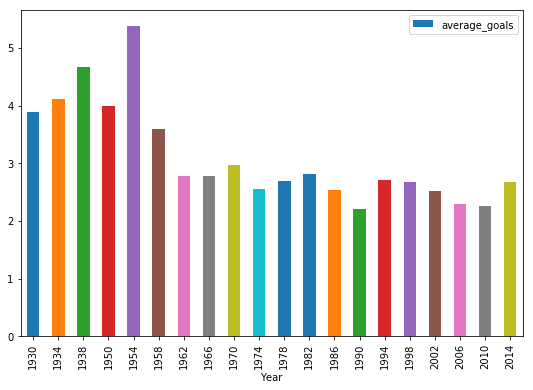

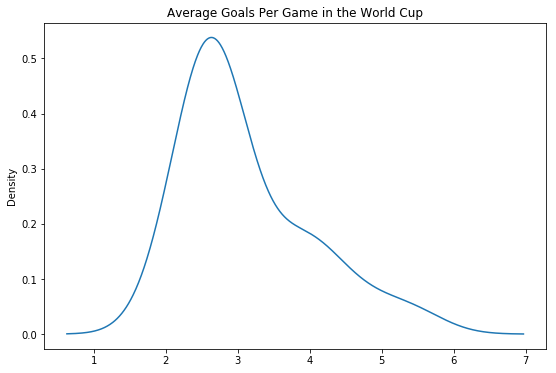

In [11]:
wcg = wc.groupby('Year')['Home_Team_Goals','Away_Team_Goals'].sum()
wcg = wcg.Home_Team_Goals + wcg.Away_Team_Goals
winners.set_index('Year')
winners.plot.bar(x = 'Year', y = 'average_goals', figsize = (9,6))
plt.show()
plt.title('Average Goals Per Game in the World Cup')
winners.average_goals.plot.kde(figsize = (9,6))
plt.show();

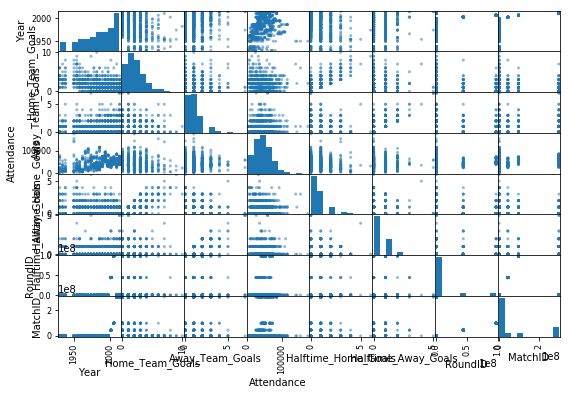

In [12]:
pd.plotting.scatter_matrix(wc.select_dtypes(include=[np.number]),figsize = (9,6));

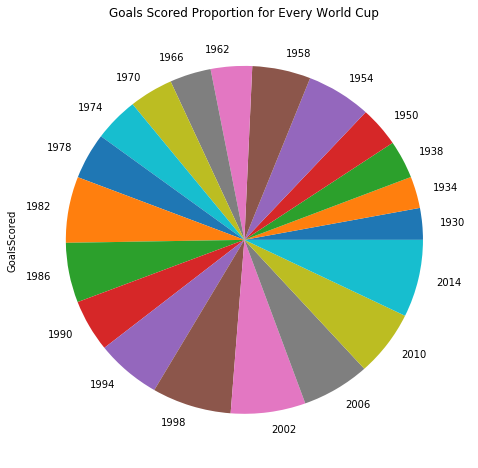

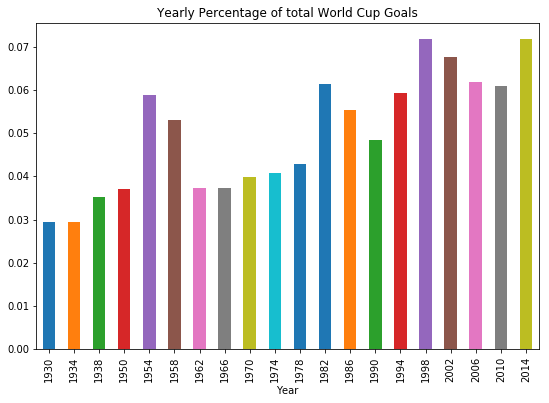

In [13]:
pieh = winners.select_dtypes(include = [np.number])
pieh.set_index('Year').plot.pie(y = 'GoalsScored',legend = False,figsize = (8,8))
plt.title('Goals Scored Proportion for Every World Cup')
plt.show()
goalsSum = winners['GoalsScored'].sum()
winners['GoalPercentage'] = winners.GoalsScored/goalsSum
winners.set_index('Year').GoalPercentage.plot.bar(figsize = (9,6))
plt.title('Yearly Percentage of total World Cup Goals');

In [15]:
def probplt(df, col):
    stats.probplot(df[col],plot = plt)
    df.set_index('Year')
    plt.show()
interact(probplt, col = cols, df = fixed(winners));

interactive(children=(Dropdown(description='col', options=('Year', 'GoalsScored', 'QualifiedTeams', 'MatchesPl…

How many times each nation finished within the Top Four in the World Cup

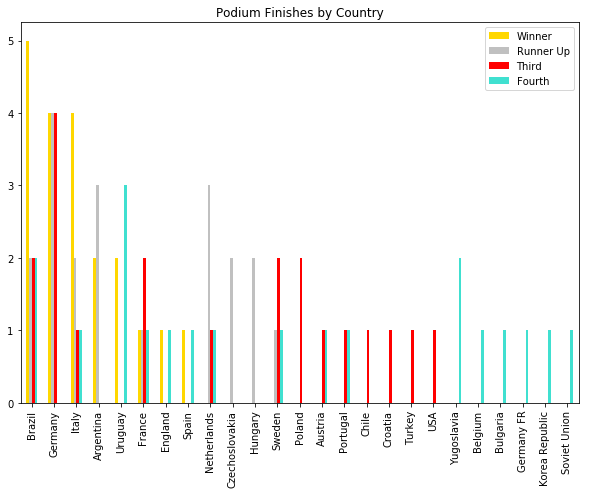

In [15]:
from IPython.display import Image
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn.linear_model import LinearRegression
from sklearn import datasets

gold = winners["Winner"]
silver = winners["Runner_up"]
bronze = winners["Third"]
fourth = winners['Fourth']

gold_count = pd.DataFrame.from_dict(gold.value_counts())
silver_count = pd.DataFrame.from_dict(silver.value_counts())
bronze_count = pd.DataFrame.from_dict(bronze.value_counts())
fourth_count = pd.DataFrame.from_dict(fourth.value_counts())

podiums = gold_count.join(silver_count, how = 'outer').join(bronze_count, how = 'outer').join(fourth_count, how= 'outer')
podiums = podiums.fillna(0)
podiums.columns = ['Winner', 'Runner Up', 'Third', 'Fourth']
podiums = podiums.sort_values(by=['Winner', 'Runner Up', 'Third', 'Fourth'], ascending=False)
podiums.plot.bar(y = podiums.columns, color = ['Gold', 'Silver', 'Red','Turquoise'], figsize = (10,7))
plt.title('Podium Finishes by Country');

In [16]:
qualifiers = winners['QualifiedTeams']
matches = winners['MatchesPlayed']

In [1]:
def numerical_value_distribution(df, col):
    df[col].plot.box()
    plt.xlabel(f'Variable {col} Distribution')
    plt.show()
interact(numerical_value_distribution, col = cols, df = fixed(winners));

NameError: name 'interact' is not defined

In [18]:
numerical_data = winners.select_dtypes(include = [np.number]).replace(np.nan,0)
target = 'average_goals'
independent = numerical_data.drop(columns = ['average_goals'])
model = LinearRegression()
model.fit(independent, numerical_data[target])
pred_goals = model.predict(independent)
winners['pred_goals'] = model.predict(independent)
winners[['average_goals','pred_goals']]


average_goals  pred_goals
0        3.888889    3.866733
1        4.117647    4.275765
2        4.666667    4.468899
3        4.000000    3.912501
4        5.384615    5.197460
5        3.600000    3.660331
6        2.781250    2.972469
7        2.781250    2.978321
8        2.968750    3.158132
9        2.552632    2.463918
10       2.684211    2.614735
11       2.807692    2.865725
12       2.538462    2.465675
13       2.211538    1.978646
14       2.711538    2.738317
15       2.671875    2.836089
16       2.515625    2.552011
17       2.296875    2.151961
18       2.265625    2.099828
19       2.671875    2.859499

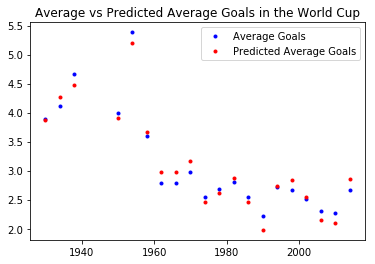

In [19]:
winners.set_index('Year')
plt.plot(winners.Year,winners[target],'.b')
plt.plot(winners.Year,pred_goals,'.r')

plt.legend(['Average Goals', 'Predicted Average Goals'])
plt.title('Average vs Predicted Average Goals in the World Cup')
plt.show();

Regplot of Average Goals vs Predicted Goals in the WC

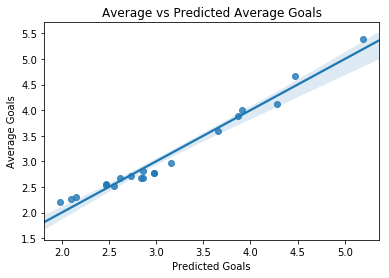

In [20]:
sns.regplot(x = 'pred_goals', y = 'average_goals', data = winners)
plt.ylabel('Average Goals')
plt.xlabel('Predicted Goals')
plt.title('Average vs Predicted Average Goals');

Creating a regplot of Average Goals per Game in the World Cup 

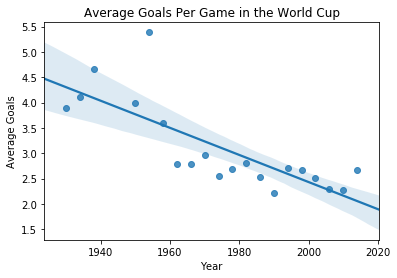

In [21]:
sns.regplot(x = 'Year' , y = 'average_goals',data = winners)
plt.ylabel('Average Goals')
plt.title('Average Goals Per Game in the World Cup');

Notice how the Average Goals Per Game is on a decreasing trend, perhaps due to improvements in the defense,
somewhat proving that the [art of defending](https://www.youtube.com/watch?v=JOYZoZpU27E) is not lost

Creating a Pie Chart of Total Goals Scored Per World Cup

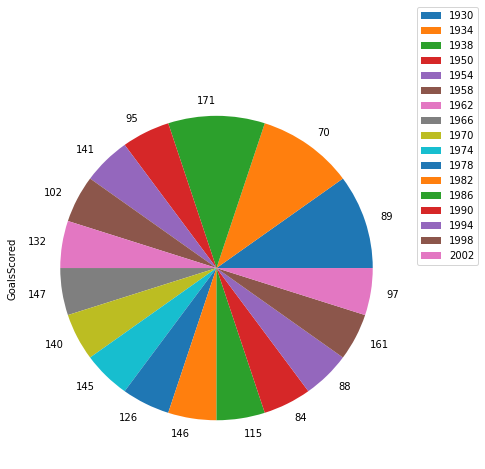

In [22]:
winners['GoalsScored'].value_counts().plot.pie(figsize = (7,7))
plt.legend(winners.Year,bbox_to_anchor=(1, 1.2));

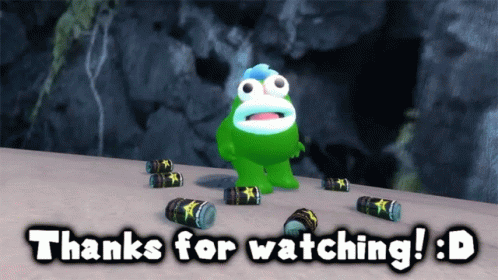

In [24]:
Image(filename='tenor.gif')